In [1]:
import xarray

import sys
sys.path.insert(0, './cartopy/')
import cartopy

import numpy as np
import matplotlib.pyplot as plt

open topography file used in CESM LENS

In [2]:
topo_file = xarray.open_dataset('USGS-gtopo30_0.9x1.25_remap_c051027.nc')
topo_data = topo_file['PHIS'].values/9.81 # surf geopot. divided by gravity
landfrac_data = topo_file['LANDFRAC'].values
topo_data[landfrac_data<0.1]=np.nan
lat = topo_file['lat'].values
lon = topo_file['lon'].values

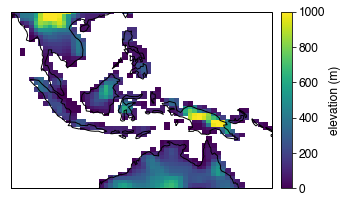

In [3]:
map_proj = cartopy.crs.PlateCarree()
data_proj = cartopy.crs.PlateCarree()
geodetic_proj = cartopy.crs.PlateCarree()

fig = plt.figure(figsize=(5,3.25))

ax = fig.add_subplot(111, projection=map_proj)
ax.coastlines()

topo_plot = ax.pcolormesh(lon,lat,topo_data,vmin=0,vmax=1000,transform=data_proj)
ax.set_extent([90,160,-20,20])

# add colorbar
axpos = ax.get_position()
cbar_ax = fig.add_axes([axpos.x1+0,axpos.y0,0.03,axpos.height])
cbar = fig.colorbar(topo_plot, cax=cbar_ax)
cbar.ax.tick_params(labelsize=12)
cbar.set_label('elevation (m)', fontsize=12)

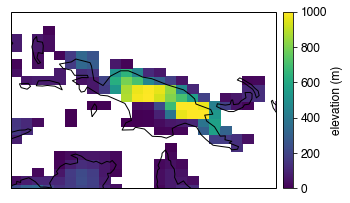

In [4]:
map_proj = cartopy.crs.PlateCarree()
data_proj = cartopy.crs.PlateCarree()
geodetic_proj = cartopy.crs.PlateCarree()

fig = plt.figure(figsize=(5,3.25))

ax = fig.add_subplot(111, projection=map_proj)
ax.coastlines()

topo_plot = ax.pcolormesh(lon,lat,topo_data,vmin=0,vmax=1000,transform=data_proj)
ax.set_extent([125,155,-15,5])

# add colorbar
axpos = ax.get_position()
cbar_ax = fig.add_axes([axpos.x1+0,axpos.y0,0.03,axpos.height])
cbar = fig.colorbar(topo_plot, cax=cbar_ax)
cbar.ax.tick_params(labelsize=12)
cbar.set_label('elevation (m)', fontsize=12)

In [5]:
# extend longitude by 2
lon_extend = np.zeros(lon.size+2)
lon_extend[1:-1] = lon
lon_extend[0] = lon[0]-np.diff(lon)[0]
lon_extend[-1] = lon[-1]+np.diff(lon)[-1]
# calculate the midpoints of this extended version
lon_pcolormesh_midpoints = lon_extend[:-1]+0.5*(np.diff(lon_extend))

# extend latitude by 2
lat_extend = np.zeros(lat.size+2)
lat_extend[1:-1] = lat
lat_extend[0] = lat[0]-np.diff(lat)[0]
lat_extend[-1] = lat[-1]+np.diff(lat)[-1]
# calculate the midpoints of this extended version
lat_pcolormesh_midpoints = lat_extend[:-1]+0.5*(np.diff(lat_extend))

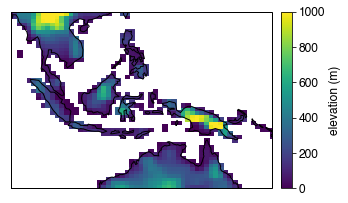

In [6]:
map_proj = cartopy.crs.PlateCarree()
data_proj = cartopy.crs.PlateCarree()
geodetic_proj = cartopy.crs.PlateCarree()

fig = plt.figure(figsize=(5,3.25))

ax = fig.add_subplot(111, projection=map_proj)
ax.coastlines()

topo_plot = ax.pcolormesh(lon_pcolormesh_midpoints,lat_pcolormesh_midpoints,topo_data,vmin=0,vmax=1000,transform=data_proj)
ax.set_extent([90,160,-20,20])

# add colorbar
axpos = ax.get_position()
cbar_ax = fig.add_axes([axpos.x1+0,axpos.y0,0.03,axpos.height])
cbar = fig.colorbar(topo_plot, cax=cbar_ax)
cbar.ax.tick_params(labelsize=12)
cbar.set_label('elevation (m)', fontsize=12)

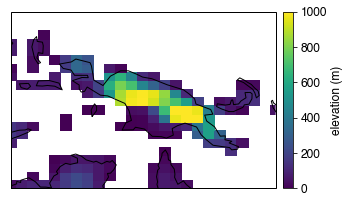

In [7]:
map_proj = cartopy.crs.PlateCarree()
data_proj = cartopy.crs.PlateCarree()
geodetic_proj = cartopy.crs.PlateCarree()

fig = plt.figure(figsize=(5,3.25))

ax = fig.add_subplot(111, projection=map_proj)
ax.coastlines()

topo_plot = ax.pcolormesh(lon_pcolormesh_midpoints,lat_pcolormesh_midpoints,topo_data,vmin=0,vmax=1000,transform=data_proj)
ax.set_extent([125,155,-15,5])

# add colorbar
axpos = ax.get_position()
cbar_ax = fig.add_axes([axpos.x1+0,axpos.y0,0.03,axpos.height])
cbar = fig.colorbar(topo_plot, cax=cbar_ax)
cbar.ax.tick_params(labelsize=12)
cbar.set_label('elevation (m)', fontsize=12)

testing regridding changes to master github branch

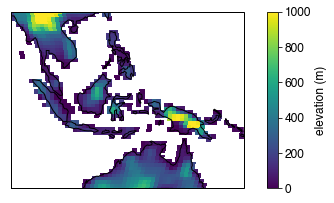

In [8]:
map_proj = cartopy.crs.Robinson()
data_proj = cartopy.crs.PlateCarree()
geodetic_proj = cartopy.crs.PlateCarree()

fig = plt.figure(figsize=(5,3.25))

ax = fig.add_subplot(111, projection=map_proj)
ax.coastlines()

topo_plot = ax.pcolormesh(lon_pcolormesh_midpoints,lat_pcolormesh_midpoints,\
                          topo_data,vmin=0,vmax=1000,transform=data_proj)
ax.set_extent([90,160,-20,20])

# add colorbar
axpos = ax.get_position()
cbar_ax = fig.add_axes([axpos.x1+0,axpos.y0,0.03,axpos.height])
cbar = fig.colorbar(topo_plot, cax=cbar_ax)
cbar.ax.tick_params(labelsize=12)
cbar.set_label('elevation (m)', fontsize=12)

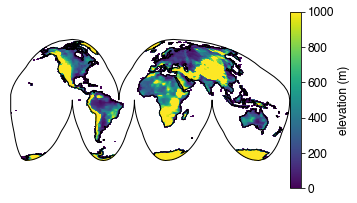

In [9]:
map_proj = cartopy.crs.InterruptedGoodeHomolosine()
data_proj = cartopy.crs.PlateCarree()
geodetic_proj = cartopy.crs.PlateCarree()

fig = plt.figure(figsize=(5,3.25))

ax = fig.add_subplot(111, projection=map_proj)
ax.coastlines()

topo_plot = ax.pcolormesh(lon_pcolormesh_midpoints,lat_pcolormesh_midpoints,\
                          topo_data,vmin=0,vmax=1000,transform=data_proj)
#ax.set_extent([90,160,-20,20])

# add colorbar
axpos = ax.get_position()
cbar_ax = fig.add_axes([axpos.x1+0,axpos.y0,0.03,axpos.height])
cbar = fig.colorbar(topo_plot, cax=cbar_ax)
cbar.ax.tick_params(labelsize=12)
cbar.set_label('elevation (m)', fontsize=12)